In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.config import INPUT_PATH, OUTPUT_PATH

In [2]:
df = pd.read_csv(INPUT_PATH / "sensor_geometry_v2.csv")
df

,sensor_id,x,y,z,string,qe
0,0,-256.14,-521.08,496.03,0,1.00
1,1,-256.14,-521.08,479.01,0,1.00
2,2,-256.14,-521.08,461.99,0,1.00
3,3,-256.14,-521.08,444.97,0,1.00
4,4,-256.14,-521.08,427.95,0,1.00
...,...,...,...,...,...,...
5155,5155,-10.97,6.72,-472.39,85,1.35
5156,5156,-10.97,6.72,-479.39,85,1.35
5157,5157,-10.97,6.72,-486.40,85,1.35
5158,5158,-10.97,6.72,-493.41,85,1.35


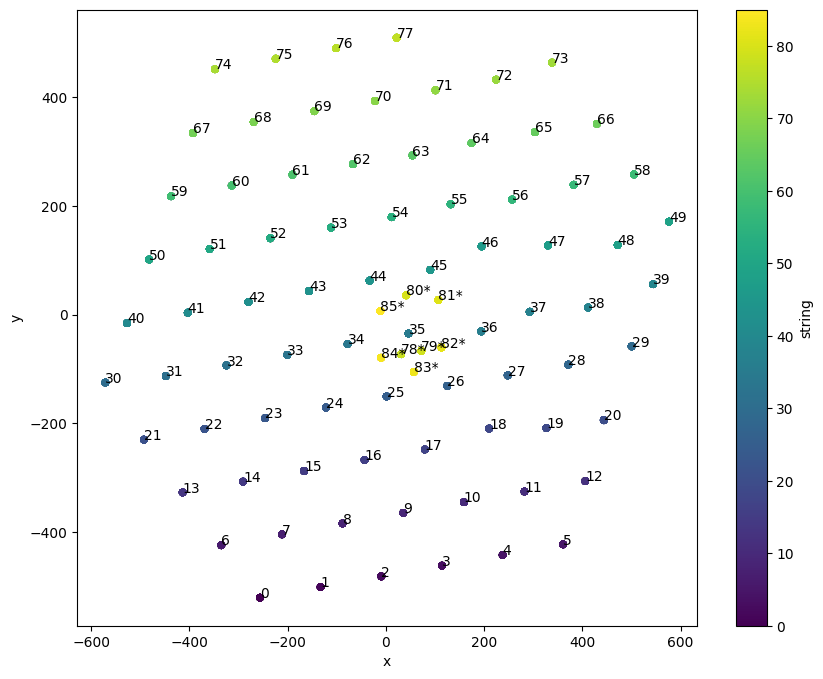

In [5]:
x = df[["x", "y", "string"]].plot(kind="scatter", x="x", y="y", c="string", cmap="viridis", figsize=(10, 8));

for index, row in df.iterrows():
    if index % 60 == 0:
        s = str(int(row["string"]))
        if row["string"] in range(78, 86):
            s += "*"
        plt.annotate(s, (row["x"], row["y"] + 0.2))

In [7]:
df.query("string == 0").head()

,sensor_id,x,y,z,string,qe
0,0,-256.14,-521.08,496.03,0,1.0
1,1,-256.14,-521.08,479.01,0,1.0
2,2,-256.14,-521.08,461.99,0,1.0
3,3,-256.14,-521.08,444.97,0,1.0
4,4,-256.14,-521.08,427.95,0,1.0


In [8]:
df.query("string == 5").head()

,sensor_id,x,y,z,string,qe
300,300,361.0,-422.83,499.51,5,1.0
301,301,361.0,-422.83,482.49,5,1.0
302,302,361.0,-422.83,465.47,5,1.0
303,303,361.0,-422.83,448.45,5,1.0
304,304,361.0,-422.83,431.43,5,1.0


In [9]:
delta_x = 361.0 - -256.14
delta_y = -422.83 - -521.08

In [11]:
angle = np.arctan(delta_y / delta_x)
angle

0.15787720716532472

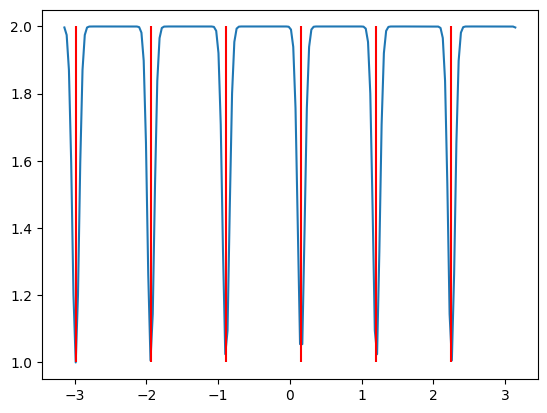

In [20]:
x = np.linspace(-np.pi, np.pi, 200)
plt.plot(x, 2 - np.cos(3 * (x - 0.15788))**50)
# plt.plot(x, 1 + np.cos(3 * (x - 0.15788))**50)


for i in range(-3, 3):
    plt.vlines(0.15788 + i * np.pi / 3, 1, 2, colors="r")